In [7]:

#imprting required libraries 
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import pickle

In [8]:
#reading the data and converting it into dataframe
PATH = 'crop_data.csv'
df = pd.read_csv(PATH)

In [9]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [11]:
#to check the dimensions
df.shape

(2200, 8)

In [12]:
#to get the attributes of data
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
#listing the different crops
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
#checking the data types of every attribute
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [15]:
#counting the presence of each crop in the data set
df['label'].value_counts()

maize          100
mango          100
chickpea       100
muskmelon      100
orange         100
blackgram      100
pigeonpeas     100
cotton         100
pomegranate    100
rice           100
coffee         100
mungbean       100
lentil         100
coconut        100
jute           100
banana         100
watermelon     100
apple          100
grapes         100
papaya         100
kidneybeans    100
mothbeans      100
Name: label, dtype: int64

<AxesSubplot:>

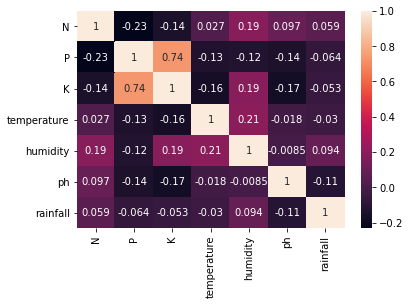

In [16]:
#visualizing the correaltion
sns.heatmap(df.corr(),annot=True)

In [17]:
#Storing in X and y for splitting
X=df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Y=df['label']

In [18]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size = 0.2,random_state=10,shuffle=True)

In [19]:

#checking the accuracy  of randomforestclassifier with different n_estimators value

from sklearn.ensemble import RandomForestClassifier

check_accuracy=[]

for i in range(1,100):
    RF = RandomForestClassifier(n_estimators=i, random_state=5)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)
    x = metrics.accuracy_score(Ytest, predicted_values)
    check_accuracy.append(x)
    
    print('For n_estimators =',i,'the accuracy is : ',x) 

For n_estimators = 1 the accuracy is :  0.9590909090909091
For n_estimators = 2 the accuracy is :  0.9681818181818181
For n_estimators = 3 the accuracy is :  0.9931818181818182
For n_estimators = 4 the accuracy is :  0.9977272727272727
For n_estimators = 5 the accuracy is :  1.0
For n_estimators = 6 the accuracy is :  0.9977272727272727
For n_estimators = 7 the accuracy is :  0.9977272727272727
For n_estimators = 8 the accuracy is :  0.9977272727272727
For n_estimators = 9 the accuracy is :  1.0
For n_estimators = 10 the accuracy is :  0.9977272727272727
For n_estimators = 11 the accuracy is :  0.9977272727272727
For n_estimators = 12 the accuracy is :  0.9954545454545455
For n_estimators = 13 the accuracy is :  0.9977272727272727
For n_estimators = 14 the accuracy is :  0.9954545454545455
For n_estimators = 15 the accuracy is :  0.9977272727272727
For n_estimators = 16 the accuracy is :  0.9977272727272727
For n_estimators = 17 the accuracy is :  0.9977272727272727
For n_estimators = 

Text(0, 0.5, 'Testing Accuracy')

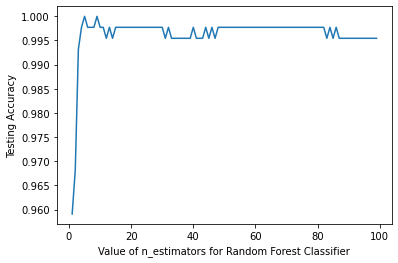

In [20]:
#plotting the accuracy for different n_estimators values
plt.plot(range(1,100), check_accuracy)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

For n_estimators = 50, the accuracy is one of the highest and consistent

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=50, random_state=5)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)

print("The Accuracy of this model: ", x)

The Accuracy of this model:  0.9977272727272727


In [22]:
#Testing with a single input
#data = [99,39,18,19.20129357,68.30578978,6.11275104,87.85092352,'maize']

RF.predict([[99,39,18,19.20129357,68.30578978,6.11275104,87.85092352]]) 

array(['maize'], dtype=object)

In [23]:

# Dump the trained Naive Bayes classifier with Pickle

filename = 'RFmodel.pkl'

# Open the file to save as pkl file
RF_file_pkl = open(filename, 'wb')
pickle.dump(RF, RF_file_pkl)

# Close the pickle instances
RF_file_pkl.close()

In [24]:
RF.predict([[90,42,43,20.8797437,82.00274423,6.502985292,202.9355362]]) 

array(['rice'], dtype=object)

In [27]:
# Pickle model 
model = pd.read_pickle(r'C:\Users\DEEP COOMER\Desktop\Internship\crop recom\crop recom\RFmodel.pkl')

In [28]:
model.predict([[99,39,18,19.20129357,68.30578978,6.11275104,87.85092352]])

array(['maize'], dtype=object)